<a href="https://colab.research.google.com/github/Diva015/MNIST-CNN-Classifier-project/blob/main/MNIST_CNN_Classifier_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


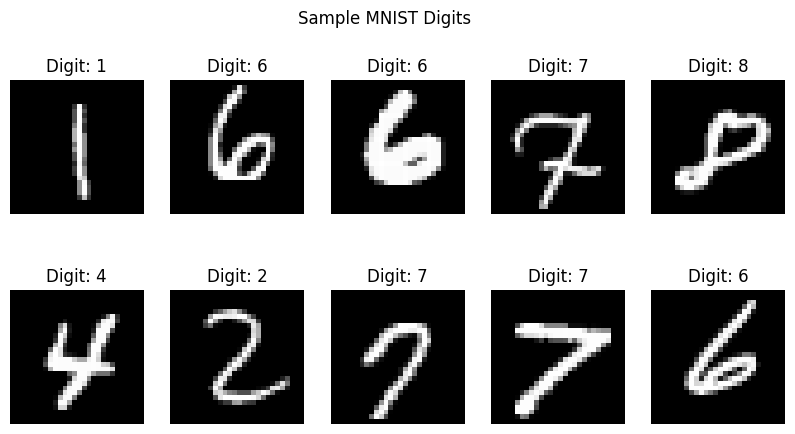

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 64s 71ms/step - accuracy: 0.7240 - loss: 0.8308 - val_accuracy: 0.9765 - val_loss: 0.0725
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 61s 72ms/step - accuracy: 0.9396 - loss: 0.1984 - val_accuracy: 0.9853 - val_loss: 0.0486
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 58s 68ms/step - accuracy: 0.9562 - loss: 0.1464 - val_accuracy: 0.9902 - val_loss: 0.0361
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 59s 69ms/step - accuracy: 0.9653 - loss: 0.1197 - val_accuracy: 0.9918 - val_loss: 0.0312
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 60s 71ms/step - accuracy: 0.9711 - loss: 0.0958 - val_accuracy: 0.9892 - val_loss: 0.0367
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 59s 69ms/step - accuracy: 0.9740 - loss: 0.0916 - val_accuracy: 0.9902 - val_loss: 0.0313
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 58s 69ms/step - accuracy: 0.9753 - loss: 0.0820 - val_accuracy: 0.9915 - val_loss: 0.0296
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 58s 69ms/step - accuracy: 0.9784 - loss: 0.0739 - 

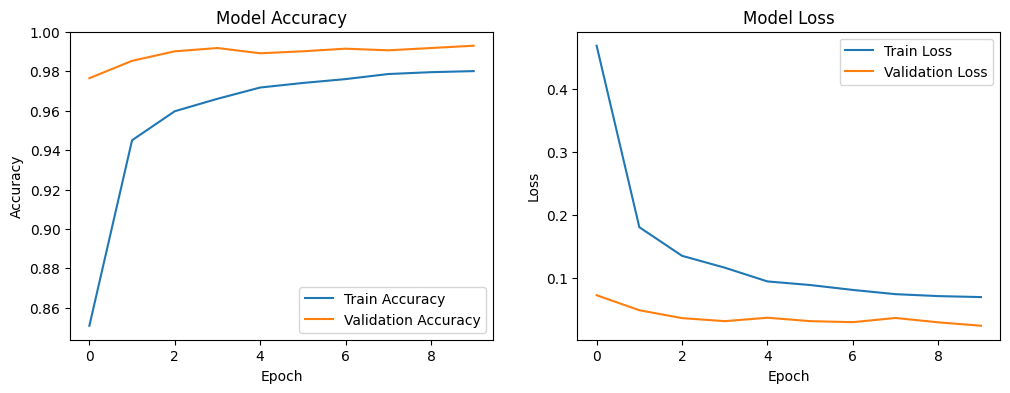

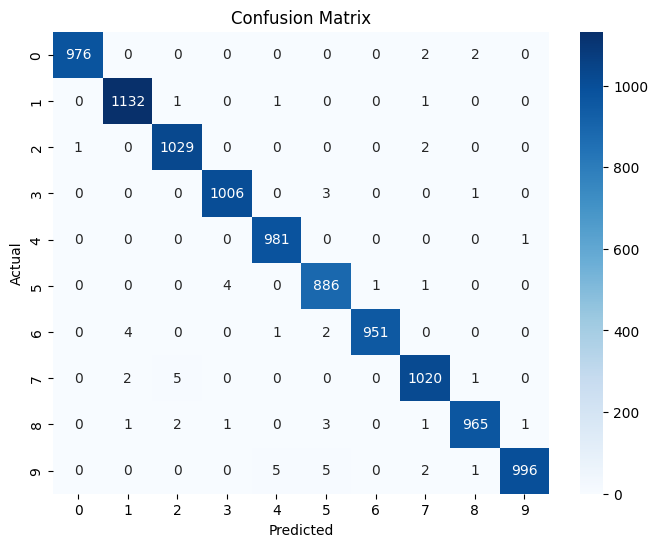

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# 1. Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1] and reshape for CNN (28x28x1)
x_train = x_train.astype('float32').reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.astype('float32').reshape(-1, 28, 28, 1) / 255.0
class_names = [str(i) for i in range(10)]  # Digits 0–9

# 2. Manually split training data into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# 3. Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f'Digit: {y_train[i]}')
    plt.axis('off')
plt.suptitle('Sample MNIST Digits')
plt.show()

# 4. Data augmentation to prevent overfitting
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

# 5. Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for digits 0–9
])

# 6. Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 7. Train model with augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=10, validation_data=(x_val, y_val), verbose=1)

# 8. Evaluate model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Detailed evaluation
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes, target_names=class_names))

# 9. Visualize training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 10. Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 11. Save model for deployment
model.save('mnist_cnn_model.h5')